Importing Libraries (why not?)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import joblib

# Ignore the warnings 
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully")

Libraries imported successfully


Importing the dataframes built in EDA

In [13]:
df = joblib.load("C:/Users/LENOVO/Desktop/Javin Programming/machine learning files/Cohort/Capstone Project/Models & Dataset/df.pkl")

In [14]:
df

,Age,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,obs_consequence,age_group
0,37,Female,United States,No,Yes,Often,Small,No,Yes,Not sure,No,Yes,Yes,Easy,No,Yes,Yes,No,36-45
2,32,Male,Canada,No,No,Rarely,Small,No,No,No,No,No,Don't know,Difficult,No,Yes,Yes,No,26-35
3,31,Male,United Kingdom,Yes,Yes,Often,Medium,No,No,Yes,No,No,No,Difficult,Yes,Yes,No,Yes,26-35
4,31,Male,United States,No,No,Never,Medium,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,Yes,Yes,No,26-35
5,33,Male,United States,Yes,No,Sometimes,Small,No,Yes,Not sure,No,Don't know,Don't know,Don't know,No,Yes,Yes,No,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,29,Male,United States,Yes,Yes,Sometimes,Medium,Yes,Yes,Yes,Yes,No,Yes,Don't know,Yes,Yes,No,No,26-35
1254,26,Male,United Kingdom,No,Yes,Unknown,Medium,No,No,No,No,No,Don't know,Easy,No,Yes,Yes,No,26-35
1255,32,Male,United States,Yes,Yes,Often,Medium,Yes,Yes,Yes,No,No,Yes,Difficult,No,Yes,Yes,No,26-35
1256,34,Male,United States,Yes,Yes,Sometimes,Large,No,Yes,Yes,No,No,Don't know,Difficult,Yes,No,No,No,26-35


Defining the features (X) and the target feature (y)

In [15]:
X = df.drop(columns=['age_group', 'treatment'])
y = df['treatment']
y = y.map({'No': 0, 'Yes': 1}) # As the column contains 'Yes' and 'No', need to convert to binary classes for Classification

Splitting data into testing and training sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models and Preprocessing

Defining the parameter grid for GridSearchCV

In [17]:
param_grids = {
    "Logistic Regression": {
        "classifier__C": [0.01, 0.1, 1, 10],
        "classifier__solver": ['lbfgs', 'saga'],
        "classifier__penalty": ['l2']
    },
    "Random Forest": {
        "classifier__n_estimators": [100, 200, 300, 500],
        "classifier__max_depth": [None, 3, 5, 7, 10],
        "classifier__max_features": ['sqrt', 'log2', None]
    },
    "KNN Classifier": {
        "classifier__n_neighbors": [3, 5, 7, 10],
        "classifier__weights": ['uniform', 'distance'],
        "classifier__metric": ['manhattan', 'euclidean']
    },
    "XGBoost Classifier": {
        "classifier__n_estimators": [100, 200, 300],
        "classifier__max_depth": [3, 5, 7],
        "classifier__learning_rate": [0.01, 0.1, 0.2],
    }
}

Separating the numerical and categorical columns for preprocessing

In [18]:
num_col = ['Age']
cat_col = ['Gender', 'family_history',
           'work_interfere', 'no_employees', 'remote_work', 'benefits',
           'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
           'mental_health_consequence', 'coworkers', 'supervisor',
           'obs_consequence']

Preprocessing

In [19]:
preprocessing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col), # Applying StandardScaler() to all the numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col) # Applying OneHotEncoder() to the categorical columns
    ]
)

In [20]:
preprocessing_tree = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col) # Applying OneHotEncoder() to the categorical columns
        # Skipping the numerical scaler as Tree based models don't need numerals to be scaled
    ]
)

In [21]:
# 1. Logistic Regression
pipe_lr = Pipeline([
    ("preprocess", preprocessing),
    ("classifier", LogisticRegression(max_iter=3000))
])
print("Applying Logistic Regression...")
print("=" * 40)

grid_lr = GridSearchCV(pipe_lr, param_grids["Logistic Regression"], cv=5, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_


y_pred_lr = best_lr.predict(X_test)
y_proba_lr = best_lr.predict_proba(X_test)[:, 1]

print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("ROC_AUC Score", roc_auc_score(y_test, y_proba_lr))
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report: \n", classification_report(y_test, y_pred_lr))
print("Best hyperparameters: ", grid_lr.best_params_)
print("=" * 40)
print("Logistic Regression applied successfully")

Applying Logistic Regression...
Accuracy:  0.8128342245989305
ROC_AUC Score 0.8897347174163783
Confusion Matrix 
 [[62 23]
 [12 90]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.73      0.78        85
           1       0.80      0.88      0.84       102

    accuracy                           0.81       187
   macro avg       0.82      0.81      0.81       187
weighted avg       0.82      0.81      0.81       187

Best hyperparameters:  {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Logistic Regression applied successfully


In [22]:
# 2. Random Forest (Tree Based Model)
pipe_rf = Pipeline([
    ("preprocess", preprocessing_tree),
    ("classifier", RandomForestClassifier(random_state=42))
])
print("Applying Random Forest Classifier...")
print("=" * 40)

grid_rf = GridSearchCV(pipe_rf, param_grids["Random Forest"], cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]


print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("ROC_AUC Score", roc_auc_score(y_test, y_proba_rf))
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report: \n", classification_report(y_test, y_pred_rf))
print("Best hyperparameters: ", grid_rf.best_params_)
print("=" * 40)
print("Random Forest Classifier applied successfully")

Applying Random Forest Classifier...
Accuracy:  0.8181818181818182
ROC_AUC Score 0.903921568627451
Confusion Matrix 
 [[66 19]
 [15 87]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.78      0.80        85
           1       0.82      0.85      0.84       102

    accuracy                           0.82       187
   macro avg       0.82      0.81      0.82       187
weighted avg       0.82      0.82      0.82       187

Best hyperparameters:  {'classifier__max_depth': 5, 'classifier__max_features': 'log2', 'classifier__n_estimators': 100}
Random Forest Classifier applied successfully


In [23]:
# 3. KNN Classifier
pipe_knn = Pipeline([
    ("preprocess", preprocessing),
    ("classifier", KNeighborsClassifier())
])
print("Applying KNN Classifier...")
print("=" * 40)

grid_knn = GridSearchCV(pipe_knn, param_grids["KNN Classifier"], cv=5, scoring='roc_auc', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_

y_pred_knn = best_knn.predict(X_test)
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]


print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("ROC_AUC Score", roc_auc_score(y_test, y_proba_knn))
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report: \n", classification_report(y_test, y_pred_knn))
print("Best hyperparameters: ", grid_knn.best_params_)
print("=" * 40)
print("KNN Classifier applied successfully")

Applying KNN Classifier...
Accuracy:  0.7807486631016043
ROC_AUC Score 0.8677047289504036
Confusion Matrix 
 [[68 17]
 [24 78]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        85
           1       0.82      0.76      0.79       102

    accuracy                           0.78       187
   macro avg       0.78      0.78      0.78       187
weighted avg       0.78      0.78      0.78       187

Best hyperparameters:  {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 10, 'classifier__weights': 'distance'}
KNN Classifier applied successfully


In [24]:
# 4. XGBoost Classifier (Tree Based Model)
pipe_xgb = Pipeline([
    ("preprocess", preprocessing_tree),
    ("classifier", XGBClassifier(eval_metric='logloss', random_state=42))
])

grid_xgb = GridSearchCV(pipe_xgb, param_grids["XGBoost Classifier"], cv=5, scoring='roc_auc', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

print("Applying XGB Classifier...")
print("=" * 40)

print("Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("ROC_AUC Score", roc_auc_score(y_test, y_proba_xgb))
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report: \n", classification_report(y_test, y_pred_xgb))
print("Best hyperparameters: ", grid_xgb.best_params_)
print("=" * 40)
print("XGB Classifier applied successfully")

Applying XGB Classifier...
Accuracy:  0.8288770053475936
ROC_AUC Score 0.903517877739331
Confusion Matrix 
 [[58 27]
 [ 5 97]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.68      0.78        85
           1       0.78      0.95      0.86       102

    accuracy                           0.83       187
   macro avg       0.85      0.82      0.82       187
weighted avg       0.85      0.83      0.82       187

Best hyperparameters:  {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 300}
XGB Classifier applied successfully


Comparison of models using ROC Curve

In [25]:
# Dictionary of model names and their predicted probabilities
model_probs_dict = {
    "Logistic Regression": y_proba_lr,
    "Random Forest": y_proba_rf,
    "XGBoost": y_proba_xgb,
    "KNN Classifier": y_proba_knn
}

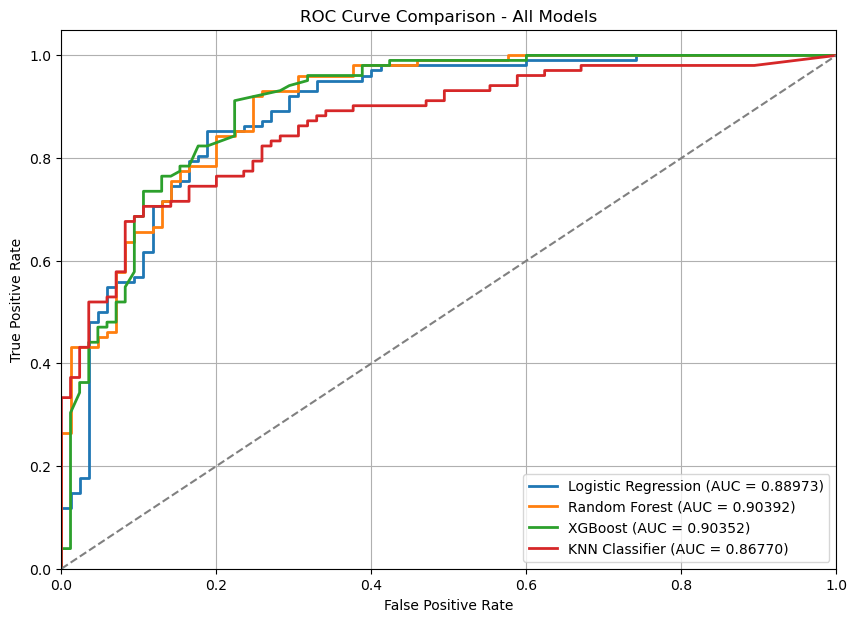

In [ ]:
# Plot ROC curves for all models
def plot_multi_roc(y_test, model_probs_dict):
    plt.figure(figsize=(10, 7))
    
    for model_name, y_proba in model_probs_dict.items():
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{model_name} (AUC = {roc_auc:.5f})")
    
    # Diagonal line for reference
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison - All Models")
    plt.legend(loc="lower right")
    plt.grid(True)

plot_multi_roc(y_test, model_probs_dict)


In [ ]:
# Dump the best model
joblib.dump(best_xgb, 'classification_model.pkl')

['classification_preprocessor.pkl']